-0.0033711497258999993
-0.009040692774100002 0.2295398191 -25.389627192906197


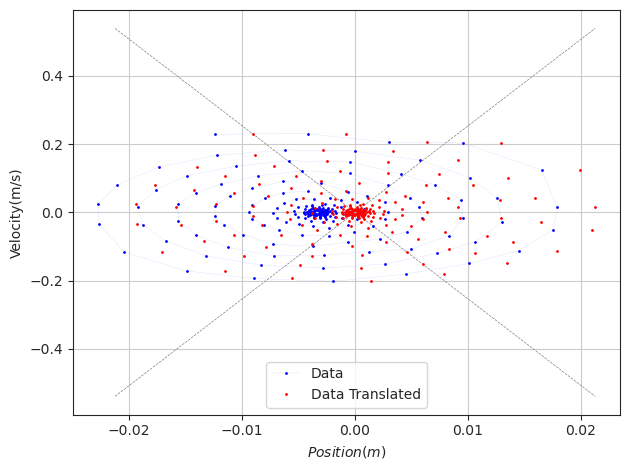

[2 2 2 1 1 1 1 1 1 1 4 4 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 1 4 4 3 3 3 3 3 3 3
 2 2 1 1 1 1 1 1 1 4 4 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 4 4 3 3 3 3 3 3 3 2 2
 1 1 1 1 1 1 1 4 4 3 3 3 3 3 3 3 2 2 1 1 1 1 1 1 4 4 3 3 3 3 3 3 3 2 2 1 1
 1 1 1 1 4 4 3 3 3 3 3 3 2 2 1 1 1 1 1 1 4 4 3 3 3 3 3 2 2 1 1 1 1 1 1 4 4
 3 3 3 3 3 2 2 1 1 1 1 1 1 4 4 3 3 3 3 3 2 2 2 1 1 1 1 1 4 4 3 3 3 3 3 2 2
 1 1 1 1 1 4 4 4 3 3 3 3 3 2 2 1 1 1 1 1 1 1 4 3 3 3 3 3 2 1 1 1 1 1 1 1 4
 4 3 3 3]
226


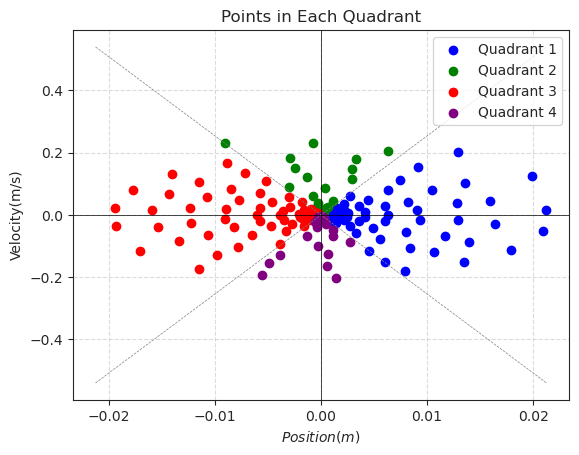

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import emcee
import corner.cornerHDR as HDR

ruta_archivo = 'U1.txt'
data = np.loadtxt(ruta_archivo)



xdata = data[:, 1]
ydata = data[:, 2]
yerr = 0.001
r_err=0.001

## Ultimos puntos para promediar y  hacer la traslación al origen de coordenadas
ultimo_punto = np.mean(xdata[-20:])
xdatat = data[:, 1]+np.abs(ultimo_punto)
print(ultimo_punto)

### puntos ára encontrar la pendiente, los límites de las líneas para calcular vueltas
xp = data[0, 1]+np.abs(ultimo_punto)
yp = data[0, 2]
m = yp/xp
print(xp,yp,m)


##Lineas rectas para separar cuadrantes
xdatas = np.linspace(-np.max(xdatat), np.max(xdatat), 100) 
r1 = m*xdatas
r2 = -m*xdatas

# Graficar los datos con barras de error (opcional)
plt.plot(xdatas, r1, color='gray',linewidth=0.5,ls='--')
plt.plot(xdatas, r2, color='gray',linewidth=0.5,ls='--')
plt.plot(xdata, ydata, color='blue', label='Data',marker='.',markersize=2.0,linewidth=0.05,ls='--')
plt.plot(xdatat, ydata, color='red', label='Data Translated',marker='.',markersize=2.0,linewidth=0.01,ls='--')
plt.xlabel(r'$Position (m)$')
plt.ylabel(r'Velocity(m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('figura1.png')
plt.show()   

# Inicializar el array para almacenar el cuadrante de cada punto
quadrant = np.zeros(len(xdatat), dtype=int)

# Determinar el cuadrante de cada punto
for i in range(len(xdatat)):
    if ydata[i]+m*xdatat[i] > 0 and ydata[i]-m*xdatat[i] >= 0:
        quadrant[i] = 2
    elif ydata[i]+m*xdatat[i] <= 0 and ydata[i]-m*xdatat[i] > 0:
        quadrant[i] = 1
    elif ydata[i]+m*xdatat[i] >= 0 and ydata[i]-m*xdatat[i] < 0:
        quadrant[i] = 3
    elif ydata[i]+m*xdatat[i] < 0 and ydata[i]-m*xdatat[i] <= 0:
        quadrant[i] = 4





print(quadrant)
print(len(quadrant))

# Separar los puntos en cada cuadrante
xdata_quadrant_1 = xdatat[quadrant == 1]
ydata_quadrant_1 = ydata[quadrant == 1]

xdata_quadrant_2 = xdatat[quadrant == 2]
ydata_quadrant_2 = ydata[quadrant == 2]

xdata_quadrant_3 = xdatat[quadrant == 3]
ydata_quadrant_3 = ydata[quadrant == 3]

xdata_quadrant_4 = xdatat[quadrant == 4]
ydata_quadrant_4 = ydata[quadrant == 4]

# Gráfico en CARTESIANAS
plt.plot(xdatas, r1, color='gray',linewidth=0.5,ls='--')
plt.plot(xdatas, r2, color='gray',linewidth=0.5,ls='--')
plt.scatter(xdata_quadrant_1, ydata_quadrant_1, color='blue', label='Quadrant 1')
plt.scatter(xdata_quadrant_2, ydata_quadrant_2, color='green', label='Quadrant 2')
plt.scatter(xdata_quadrant_3, ydata_quadrant_3, color='red', label='Quadrant 3')
plt.scatter(xdata_quadrant_4, ydata_quadrant_4, color='purple', label='Quadrant 4')
plt.legend(loc='upper right')
plt.xlabel(r'$Position (m)$')
plt.ylabel(r'Velocity(m/s)')
plt.title('Points in Each Quadrant')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('figura2.png')
plt.show()



In [2]:

def generar_vueltas(array):
    vueltas = []
    i = 0
    while i < len(array):
        if array[i] == 2:
            # Buscar el índice donde inicia una secuencia de dos o más elementos iguales
            start_idx = i
            while i < len(array) - 1 and array[i] == array[i + 1]:
                i += 1
            # Agregar la secuencia encontrada a las vueltas
            vuelta =   array[start_idx: i +1]
            # Agregar los siguientes números hasta encontrar un 2 nuevamente
            i += 1
            while i < len(array) and array[i] != 2:
                vuelta.append(array[i])
                i += 1
            vueltas.append(vuelta)
        i += 0
    return vueltas


def imprimir_vueltas(vueltas):
    for i, vuelta in enumerate(vueltas, start=1):
        print(f"vuelta{i}: {', '.join(map(str, vuelta))}")
# Array original proporcionado por el usuario
array_final = quadrant.tolist()
print(array_final)
print(len(array_final))
# Generar las vueltas
vueltas = generar_vueltas(array_final)

# Imprimir las vueltas generadas
imprimir_vueltas(vueltas)


[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3]
226
vuelta1: 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3
vuelta2: 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3
vuelta3: 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3
vuelta4: 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3
vuelta5: 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3
vuelta6

In [3]:
# Inicializar la lista transformada con listas vacías
transformada = [[] for _ in range(len(vueltas))]

# Recorrer la lista original y asignar el valor de la vuelta correspondiente
for vuelta, numeros in enumerate(vueltas):
    valor_vuelta = vuelta + 1
    for numero in numeros:
        transformada[vuelta].append(valor_vuelta)

# Mostrar la lista transformada
for vuelta, numeros in enumerate(transformada, start=1):
    print(f"Vuelta {vuelta}: {numeros}")



# Inicializamos una lista vacía para almacenar los elementos de las sublistas
lista_final = []

# Recorremos cada sublista y extendemos la lista_final con sus elementos
for transformada in transformada:
    lista_final.extend(transformada)
print(len(lista_final))


Vuelta 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Vuelta 2: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Vuelta 3: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Vuelta 4: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Vuelta 5: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Vuelta 6: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Vuelta 7: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Vuelta 8: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Vuelta 9: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Vuelta 10: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Vuelta 11: [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Vuelta 12: [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
Vuelta 13: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
Vuelta 14: [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
226


In [4]:
import pandas as pd
XD=xdatat.tolist()
YD=ydata.tolist()
# Crear un DataFrame con las columnas deseadas
datanew = pd.DataFrame({
    'X': XD,
    'Y': YD,
    'Quadrant': array_final,
    'Vuelta': lista_final
})

# Configurar opciones para la visualización de pandas
pd.set_option('display.float_format', '{:.2E}'.format)  # Formato para mostrar números en notación científica

# Mostrar la tabla dinámica
print(datanew)
X=np.array(XD)
Y=np.array(YD)
D3=np.array(array_final)
V=np.array(lista_final)

            X         Y  Quadrant  Vuelta
0   -9.04E-03  2.30E-01         2       1
1   -8.04E-04  2.31E-01         2       1
2    6.33E-03  2.06E-01         2       1
3    1.29E-02  2.03E-01         1       1
4    1.99E-02  1.25E-01         1       1
..        ...       ...       ...     ...
221  1.93E-04 -5.34E-03         4      14
222 -1.33E-04 -7.54E-03         4      14
223 -3.09E-04 -3.25E-03         3      14
224 -3.49E-04 -3.57E-04         3      14
225 -3.33E-04 -1.83E-05         3      14

[226 rows x 4 columns]


Valor numérico de la primera fila: 10.553164321169879
Valor numérico de la primera fila: 10.582499869786059
Valor numérico de la segunda fila: 0.5640679757176217
Valor numérico de la segunda fila: 0.5423803810636396
El promedio de aone y atwo es: 10.567832095477968
El promedio de bone y btwo es: 0.5532241783906306
0.250691933988811
1.973088446094217
[96.22086805 95.85547386 95.50897154 95.24356193 94.82310754 94.36988187
 94.07361242 93.75188285 93.4616391  93.11846523 92.75015185 92.38532455
 92.07815232 91.71500058 91.32676558 97.32843726 97.02836007 96.68880165
 96.34228714 89.70134806 89.34355282 88.98799425 88.61789161 88.26453206
 87.85101859 87.47314719 87.17130713 86.79743496 86.42756913 86.07600868
 85.72937288 85.39244824 85.09735139 91.0607231  90.73987574 90.41511693
 90.0570736  83.42329202 83.04896794 82.66127635 82.34687421 81.99918595
 81.61488574 81.21601768 80.82123616 80.5148371  80.16501599 79.80876445
 79.45069958 79.10719086 78.77773809 84.69679242 84.39771727 84.

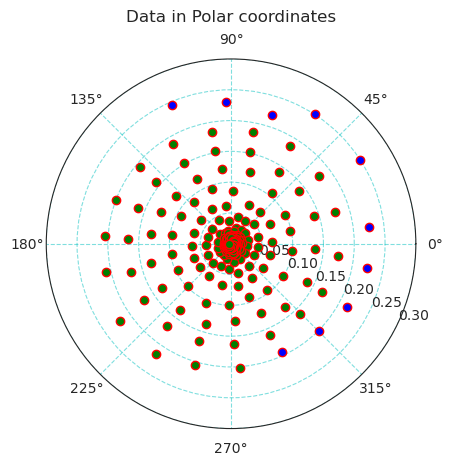

In [5]:
# Convertir coordenadas cartesianas a polares para cada conjunto de datos en cada cuadrante
with open('parametrosx.txt', 'r') as file:
    for line_number, line in enumerate(file, 1):
        if line_number == 3:
            aone = float(line.split('=')[1].strip())
            break
with open('parametrosv.txt', 'r') as file:
    for line_number, line in enumerate(file, 1):
        if line_number == 3:
            atwo = float(line.split('=')[1].strip())
            break

print("Valor numérico de la primera fila:", aone)
print("Valor numérico de la primera fila:", atwo)


with open('parametrosx.txt', 'r') as file:
    for line_number, line in enumerate(file, 1):
        if line_number == 2:
            bone = float(line.split('=')[1].strip())
            break
with open('parametrosv.txt', 'r') as file:
    for line_number, line in enumerate(file, 1):
        if line_number == 2:
            btwo = float(line.split('=')[1].strip())
            break

print("Valor numérico de la segunda fila:", bone)
print("Valor numérico de la segunda fila:", btwo)

# Calcular el promedio
proma = (aone + atwo) / 2

print("El promedio de aone y atwo es:", proma)

# Calcular el promedio
promb = (bone + btwo) / 2

print("El promedio de bone y btwo es:", promb)
# Convertir coordenadas cartesianas a polares para cada conjunto de datos en cada cuadrante OJO
rdata =np.sqrt((promb*X+Y)**2+(proma*X)**2)
atan_yx = np.arctan2((Y[0]+promb*X[0]), proma*X[0])
thetadata= np.abs(np.arctan2((Y+promb*X), proma*X)+2*np.pi*(16-V))
print(np.max(rdata))
print(atan_yx)
print(thetadata)


# Graficar los primeros 10 puntos en rojo en coordenadas polares
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(thetadata[:10], rdata[:10],color='b',edgecolors='r',label='Polar Points (First 10)')
ax.scatter(thetadata[10:], rdata[10:],color='g',edgecolors='r',label='Polar Points (Remaining)')
ax.set_rmax(np.max(rdata))
ax.set_rticks([0.05, 0.1, 0.15, 0.2, 0.25,0.3])  # Less radial ticks
ax.set_rlabel_position(-25.0)  # Move radial labels away from plotted line
ax.grid(True, linestyle='--', alpha=0.5, color='c')
ax.set_title("Data in Polar coordinates", va='bottom')
plt.savefig('figura3.png')
plt.show()




100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 310.59it/s]


Parámetro 1: 1.83e-01 +8.77e-03 -8.00e-03
Parámetro 2: -4.64e-02 +6.09e-06 -6.50e-06
Parámetro 3: -9.05e+01 +9.62e-01 -1.01e+00
[0.18317361197515508, -0.04642368088530615, -90.49848501411361]
[0.24401933 0.23025763 0.21951523 0.25069193 0.25037445 0.22625184
 0.22459773 0.21487246 0.20124996 0.19522189 0.20208988 0.20562237
 0.21606719 0.21987352 0.20878756 0.205419   0.20026267 0.19397979
 0.18753343 0.18415457 0.18511242 0.18502404 0.18014218 0.17602001
 0.17461071 0.16766456 0.1600723  0.16119215 0.16349883 0.16646407
 0.16860893 0.16824783 0.16896754 0.16812378 0.16180611 0.15773943
 0.15202131 0.15212312 0.15262131 0.14049685 0.13998388 0.14222605
 0.13674326 0.13838707 0.13509954 0.12274651 0.12575992 0.13604428
 0.13568583 0.13387492 0.13346562 0.13132047 0.12433079 0.11913411
 0.11826432 0.12205491 0.11985009 0.10589964 0.09843859 0.09818002
 0.09892094 0.09905724 0.09526148 0.09105796 0.09956303 0.10389655
 0.09758264 0.0963527  0.09692189 0.0962873  0.09298488 0.09044714
 0.0

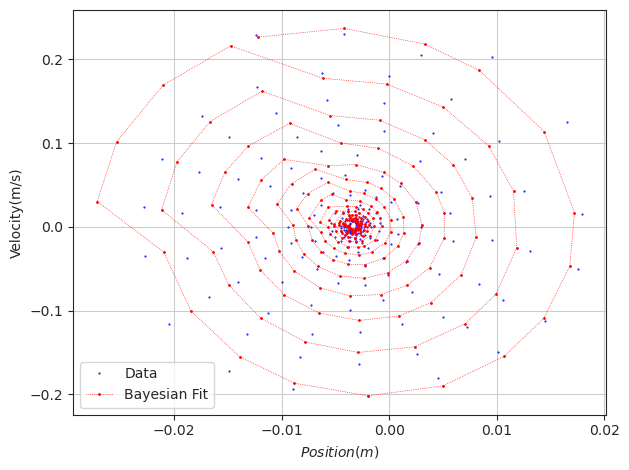

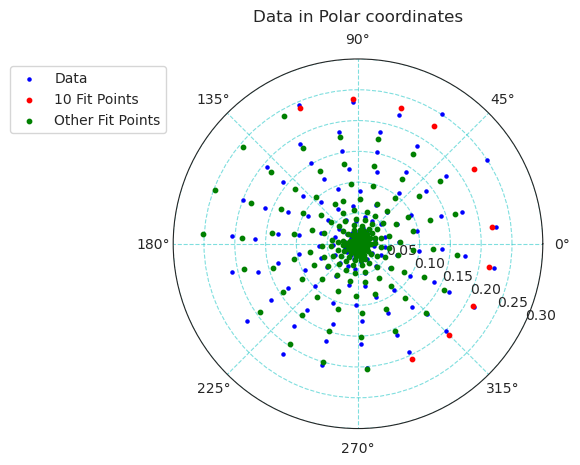

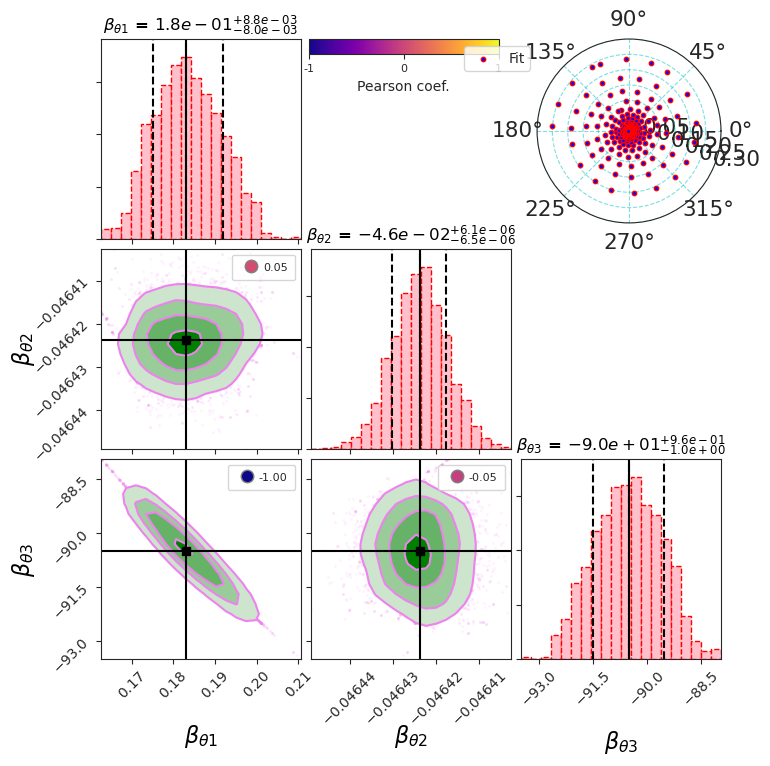

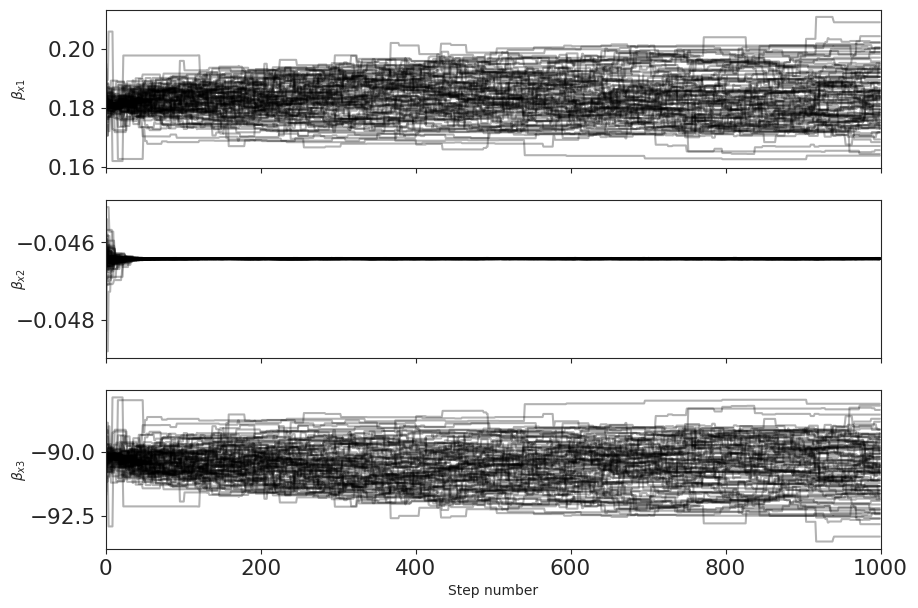

In [6]:
def polar(theta, a, b, c):
    return a * np.exp(-b * (theta+c))

r_err = 0.0001
# Logaritmo de la prior
def log_prior(params):
    a, b, c = params
    # Definir las priors para cada parámetro
    # Por ejemplo, prior uniforme para a, b en ciertos rangos:
    if 0.01 < a < 2 and -0.2 < b < -0.001 and -360 < c < -20:
        return 0.0
    return -np.inf

# Logaritmo de la probabilidad
def log_probability(params, theta, r, r_err):
    prior = log_prior(params)
    if not np.isfinite(prior):
        return -np.inf  
    

    r_model = polar(theta, *params)
    chi_squared = np.sum(((r - r_model) / r_err) ** 2)
    log_likelihood = -0.5 * chi_squared

    return prior + log_likelihood

initial_guess = [0.2, -0.04, -90]

# Número de caminantes y dimensiones
nwalkers = 100
ndim = len(initial_guess)

# Genera una muestra inicial aleatoria de parámetros
pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)

# Crea el objeto sampler
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr))
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr), moves=[(emcee.moves.DEMove(), 0.5), (emcee.moves.DESnookerMove(), 0.5)])
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability,args=(thetadata, rdata, r_err), moves=emcee.moves.StretchMove(a=0.1))

# Ejecutar MCMC para el calentamiento
n_burnin_steps = 50
pos, _, _ = sampler.run_mcmc(pos, n_burnin_steps)

# Reiniciar las cadenas para la fase de muestreo posterior al calentamiento
sampler.reset()

# Ejecuta el muestreo MCMC
n_steps = 1000
sampler.run_mcmc(pos, n_steps, progress=True)



# Obtén las cadenas de muestras generadas por el muestreo
samples = sampler.get_chain()

# Obtén las muestras planas
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
#print(flat_samples)



# Muestra los valores de los parámetros ajustados
parametros_ajustados = []
for i in range(ndim):
    mcmc_result = np.percentile(flat_samples[:, i], [16, 50, 84])
    parametros_ajustados.append(mcmc_result[1])
    print(f"Parámetro {i+1}: {mcmc_result[1]:.2e} +{mcmc_result[2]-mcmc_result[1]:.2e} -{mcmc_result[1]-mcmc_result[0]:.2e}")

print(parametros_ajustados)    
a = parametros_ajustados[0]
b = parametros_ajustados[1]
c = parametros_ajustados[2]

Medianas = np.array(parametros_ajustados)


r_teo = a * np.exp(-b * (thetadata+c))
print(rdata)
print(r_teo)
print(thetadata)

# Ecuaciones cartesianas
x_fit = r_teo*np.cos(thetadata)/proma - np.abs(ultimo_punto)
y_fit = r_teo* np.sin(thetadata)-promb*x_fit
# ajustamos los datos tanto de posición como de velocidad
plt.plot(xdata, ydata, color='blue', label='Data',marker='.',markersize=1.0,linewidth=0.5,ls='None')
plt.plot(x_fit, y_fit, color='red', label='Bayesian Fit',marker='.',markersize=2.0,linewidth=0.5,ls=':')
plt.xlabel(r'$Position (m)$')
plt.ylabel(r'Velocity(m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figura4.png')
plt.show() 


fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(thetadata, rdata,color='b',edgecolors='b',label='Data',s=5)
ax.scatter(thetadata[:10], r_teo[:10],color='r',edgecolors='r',label='10 Fit Points',s=10)
ax.scatter(thetadata[10:], r_teo[10:],color='g',edgecolors='g',label='Other Fit Points',s=10)
ax.set_rmax(np.max(rdata))
ax.set_rticks([0.05, 0.1, 0.15, 0.2, 0.25,0.3])  # Less radial ticks
ax.set_rlabel_position(-25.0)  # Move radial labels away from plotted line
ax.grid(True, linestyle='--', alpha=0.5, color='c')
ax.set_title("Data in Polar coordinates", va='bottom')
plt.legend(loc='best', bbox_to_anchor=(0.0, 1.0))
plt.savefig('figura5.png',dpi=600)
plt.show()




lista_medianas = Medianas.tolist()
import corner.cornerHDR as HDR
labels = [r'$\beta_{\theta1}$', r'$\beta_{\theta2}$',r'$\beta_{\theta3}$']
label_kwargs = {"fontsize": 16, "color": "black", "fontweight": "bold"}
fig = HDR.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84],
    color="black",
    show_titles=True,
    add_pvalue=True,
    plot_density=True,
    plot_contours=True,
    smooth=1.0,
    max_n_ticks=5,
    use_math_text=True,
    fill_contours=True,
    truths= lista_medianas,
    truth_color="black",
    title_fmt='.1e',
    color_hist="violet",color_dens="green",
    group="posterior",
    label_kwargs=label_kwargs,
    hist_kwargs={"color": "pink","edgecolor": "red","linestyle":"dashed", "linewidth": 1,"alpha": 1.0,"histtype":"barstacked"},
    title_kwargs={"fontsize": 12,"color": "Black", "fontweight": "bold"})
# Crear la figura y el subplot para el gráfico de plt.plot
#(10, 10): Este es el tamaño de la cuadrícula
#(1, 6): Esta es la posición en la cuadrícula donde deseas que comience el subplot 
#que estás creando. Los índices son basados en cero, por lo que (1, 6) corresponde a 
#la fila 2 (índice 1) y la columna 7 (índice 6) de la cuadrícula.
ax = plt.subplot2grid((10, 10), (0, 7), rowspan=3, colspan=3,projection='polar') # Subplot en una disposición de 3 filas y 3 columnas, seleccionando el tercer subplot
# Código para generar el gráfico de plt.plot
ax.scatter(thetadata, r_teo,color='b',edgecolors='r',label='Fit',s=10)
ax.set_rmax(np.max(rdata))
ax.set_rticks([0.05, 0.1, 0.15, 0.2, 0.25,0.3])  # Less radial ticks
ax.set_rlabel_position(-25.0)  # Move radial labels away from plotted line
ax.grid(True, linestyle='--', alpha=0.5, color='c')
ax.legend(loc='best', bbox_to_anchor=(0.0, 1.0))
plt.savefig("PolarBig.png",dpi=600)
plt.show()


# Diagnóstico de convergencia: Trace plot
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = [r'$\beta_{x1}$', r'$\beta_{x2}$', r'$\beta_{x3}$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("Step number")

plt.savefig("ConvergencePolar.png",dpi=600)
plt.show()
